### Import Libraries and Read File

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Python36/Projects/NLP/spam.tsv',sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
df.nunique()

label         2
message    5169
length      274
punct        38
dtype: int64

In [6]:
df.shape

(5572, 4)

In [7]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Balance the data

In [8]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [9]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [14]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [15]:
ham = ham.sample(spam.shape[0])

In [16]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [18]:
data = ham.append(spam, ignore_index=True)
data.head()

,label,message,length,punct
0,ham,Jus finish blowing my hair. U finish dinner al...,52,2
1,ham,Yes but I don't care cause I know its there!,44,2
2,ham,Save yourself the stress. If the person has a ...,125,3
3,ham,I am great princess! What are you thinking abo...,55,4
4,ham,R ü going 4 today's meeting?,28,2


In [19]:
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


### Exploratory Data Analysis

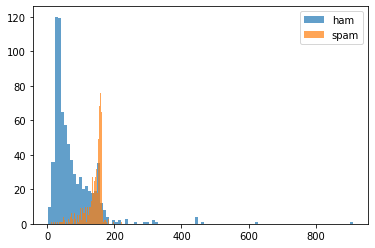

In [33]:
#ham and spam vs character length
plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.7, label='ham')
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.7, label='spam')
plt.legend()
plt.show()

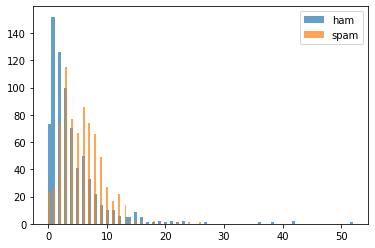

In [34]:
#ham and spam vs punctuation
plt.hist(data[data['label']=='ham']['punct'], bins=100, alpha=0.7, label='ham')
plt.hist(data[data['label']=='spam']['punct'], bins=100, alpha=0.7, label='spam')
plt.legend()
plt.show()

### Data Preparation

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
data.head()

,label,message,length,punct
0,ham,Jus finish blowing my hair. U finish dinner al...,52,2
1,ham,Yes but I don't care cause I know its there!,44,2
2,ham,Save yourself the stress. If the person has a ...,125,3
3,ham,I am great princess! What are you thinking abo...,55,4
4,ham,R ü going 4 today's meeting?,28,2


In [43]:
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


In [44]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=0, shuffle=True, stratify=data['label'])

In [47]:
X_train.shape, y_train.shape

((1045,), (1045,))

In [48]:
X_test.shape, y_test.shape

((449,), (449,))

### Bag of Words Creation

In [52]:
vectorizer = TfidfVectorizer()

In [53]:
X_train = vectorizer.fit_transform(X_train)
X_train.shape

(1045, 3738)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=0, shuffle=True, stratify=data['label'])
#called again to save changes made to X_train

### Pipeline and Random Forest Classifier

In [54]:
#pipeline to ensure vectorization while classification 

In [57]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [58]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [59]:
y_pred = clf.predict(X_test)

In [60]:
confusion_matrix(y_test, y_pred)

array([[223,   2],
       [ 27, 197]], dtype=int64)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.99      0.94       225
        spam       0.99      0.88      0.93       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [62]:
accuracy_score(y_test, y_pred)

0.9354120267260579

In [63]:
clf.predict(['This is Sehej.'])

array(['ham'], dtype=object)

In [64]:
clf.predict(['Wassup, dog?'])

array(['ham'], dtype=object)

In [71]:
clf.predict(["Congratulations! You have won a free ticket to USA. Text 'WON' to 4567861"])

array(['spam'], dtype=object)

In [72]:
clf.predict(["You have won a free ticket to USA. Text 'WON' to 4567861"])

array(['spam'], dtype=object)

In [73]:
clf.predict(["You have won a ticket to USA. Text 'WON' to 4567861"])

array(['spam'], dtype=object)

### Pipeline and SVM

In [97]:
clf1 = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C=1000, gamma='auto'))])

In [98]:
clf1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_fun

In [99]:
y_pred1 = clf1.predict(X_test)

In [100]:
confusion_matrix(y_test, y_pred1)

array([[220,   5],
       [ 17, 207]], dtype=int64)

In [101]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         ham       0.93      0.98      0.95       225
        spam       0.98      0.92      0.95       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [102]:
accuracy_score(y_test, y_pred1)

0.9510022271714922

In [103]:
clf1.predict(['This is Sehej.'])

array(['ham'], dtype=object)

In [104]:
clf1.predict(['Wassup, dog?'])

array(['ham'], dtype=object)

In [105]:
clf1.predict(["Congratulations! You have won a free ticket to USA. Text 'WON' to 4567861"])

array(['spam'], dtype=object)

In [106]:
clf1.predict(["You have won a free ticket to USA. Text 'WON' to 4567861"])

array(['spam'], dtype=object)

In [107]:
clf1.predict(["You have won a ticket to USA. Text 'WON' to 4567861"])

array(['spam'], dtype=object)

In [96]:
clf1.predict(["You have won a ticket to USA."])

array(['ham'], dtype=object)